### Read data

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("assignment_rev2.csv.xls")

In [3]:
df.head(5)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,...,False,True,False,True,True,False,False,False,False,True


We have in total 15447 data points

### Clean data

**Replace/Remove NaN**

In [4]:
df.isnull().sum()

id                             0
ranking_score                  0
agent_id                     104
geography_name                 0
sq_meters                      0
price                          0
year_of_construction           0
floor                        732
subtype                        0
rooms                          0
no_of_bathrooms                0
energy_class               13340
renovation_year            13380
no_of_wc                       0
ad_type                        0
living_rooms                   0
kitchens                       0
balcony_area                   0
lux_home                    4238
new_development             3606
garage                      1630
furnished                   4169
preserved                   5433
investment                  4964
unfinished                  5420
equipped                   15447
heating_under_floor         4677
renovated                   4329
requires_renovation         4882
airy                        3518
bright    

In [5]:
# remove NAs from agent_id as this is information we want to have and only ~0.7% of the data will be dropped
df.dropna(axis = 0, subset = ["agent_id"], inplace = True)

# remove NAs from floor as this is information we want to have and only ~5% of the data will be dropped
df.dropna(axis = 0, subset = ["floor"], inplace = True)

# column equipped contains only NA values - so drop the entire column from df
df.drop(columns=['equipped'], inplace = True)

# column energy_class contains ~95% NA values - so drop the entire column from df
df.drop(columns=['energy_class'], inplace = True)

# ASSUMPTION: for values in binary columns, the NA is in reality a 0 - ie there is not such item in the property
## we will do this when cleaning the data types (look below)

# NA in renovation_year means that the property has not been renovated and this is important information so we will not change it
# however since we only have values for 14% of the data points, then might do some feature engineering later on - eg binary value: renovated 1/0

In total have dropped only ~5% of the data. Now we have 14614 data points.

**Clean data types**

In [6]:
# change agent_id and renovation_year from float to int
df['agent_id'] = df['agent_id'].astype('Int64')
df['renovation_year'] = df['renovation_year'].astype('Int64')

# floor: replace str values with numbers to change from object to int
df['floor'].replace({'ground-floor': 0, 'basement': -1, 'semi-basement': -0.5, 'mezzanine': 0.5}, inplace=True)
df['floor'] = df['floor'].astype('float')

# change all object/boolean to int/binary
# ASSUMPTION: for values in binary columns, the NA is in reality a 0 - ie there is not such item in the property
for a in df.select_dtypes(include=object):
    try:
        df[a].replace({False: 0, True: 1}, inplace=True)
        df[a] = df[a].astype('Int64')
        df[a] = df[a].fillna(0)
    except:
        pass

**Deeper look into the highlighted variables mentioned in assignment**

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_95177/1585622511.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


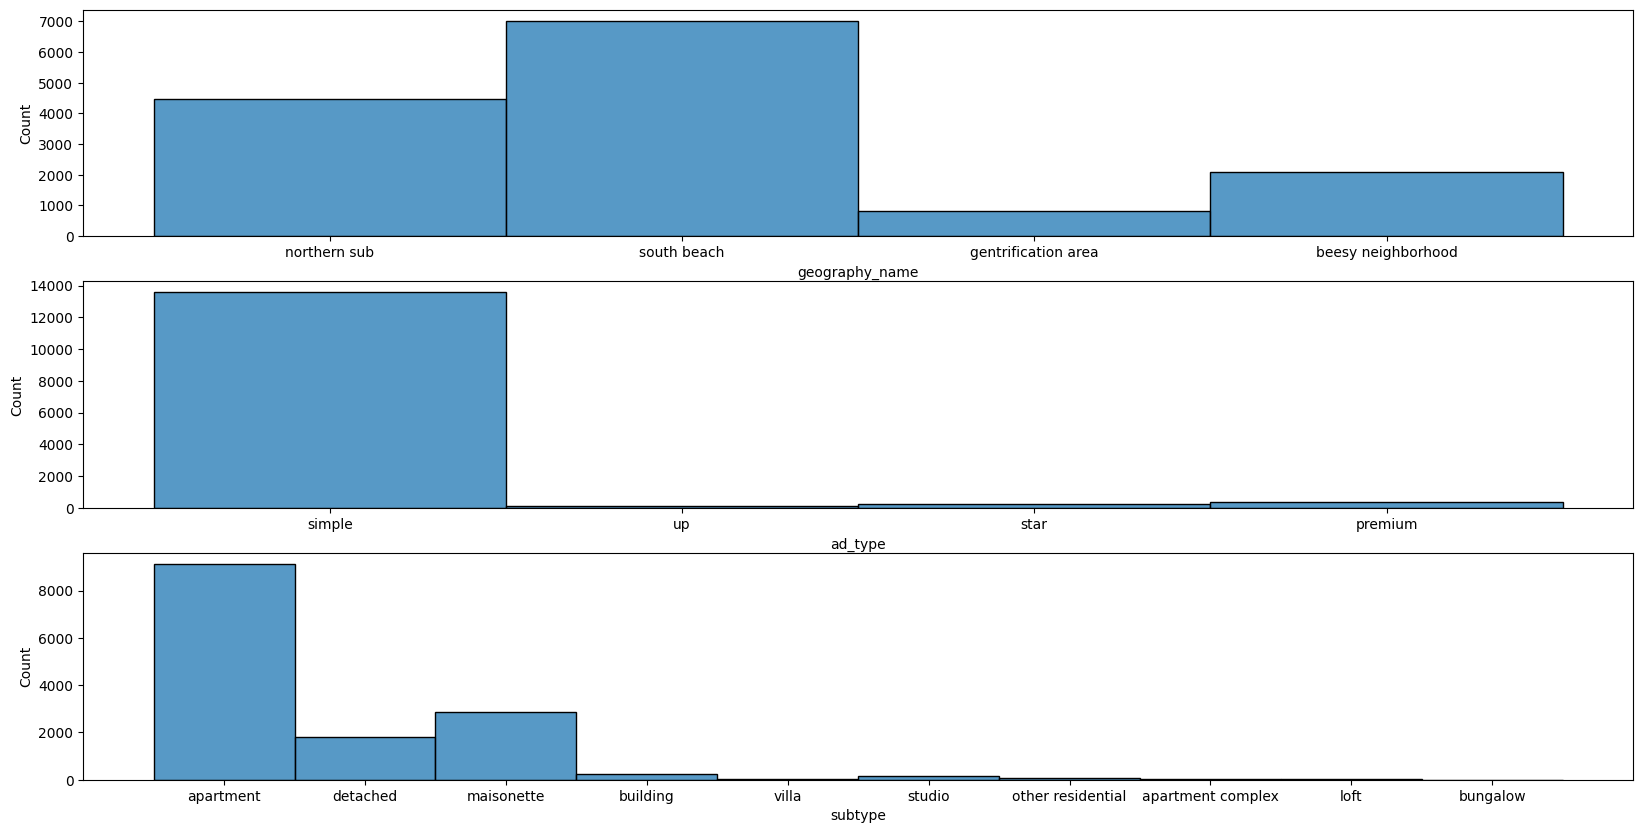

In [12]:
# Plot histograms for the categorical features

fig, ax = plt.subplots(3,1, figsize=(20,10))
sns.histplot(df['geography_name'], ax = ax[0])
sns.histplot(df['ad_type'], ax = ax[1])
sns.histplot(df['subtype'], ax = ax[2])
fig.show()

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_95177/2049019640.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


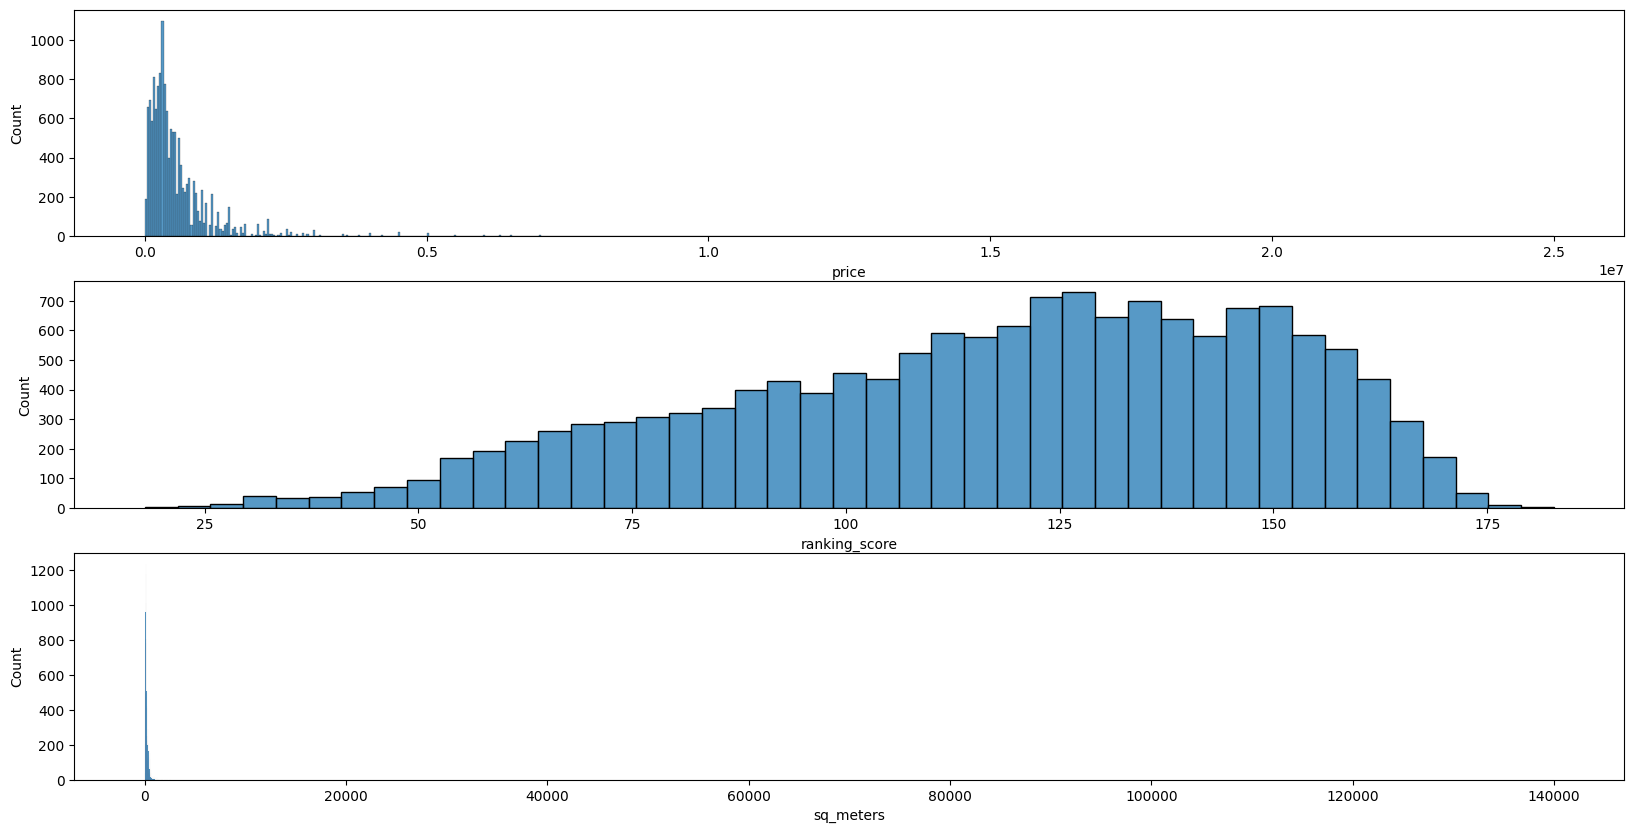

In [7]:
# Plot histograms for the numerical features

fig, ax = plt.subplots(3,1, figsize=(20,10))
sns.histplot(df['price'], ax = ax[0])
sns.histplot(df['ranking_score'], ax = ax[1])
sns.histplot(df['sq_meters'], ax = ax[2])
fig.show()

From the above histograms, we can clearly see that there are outliers in price and sq_meters which need to be treated

**Remove outliers**

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_95177/1251574918.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


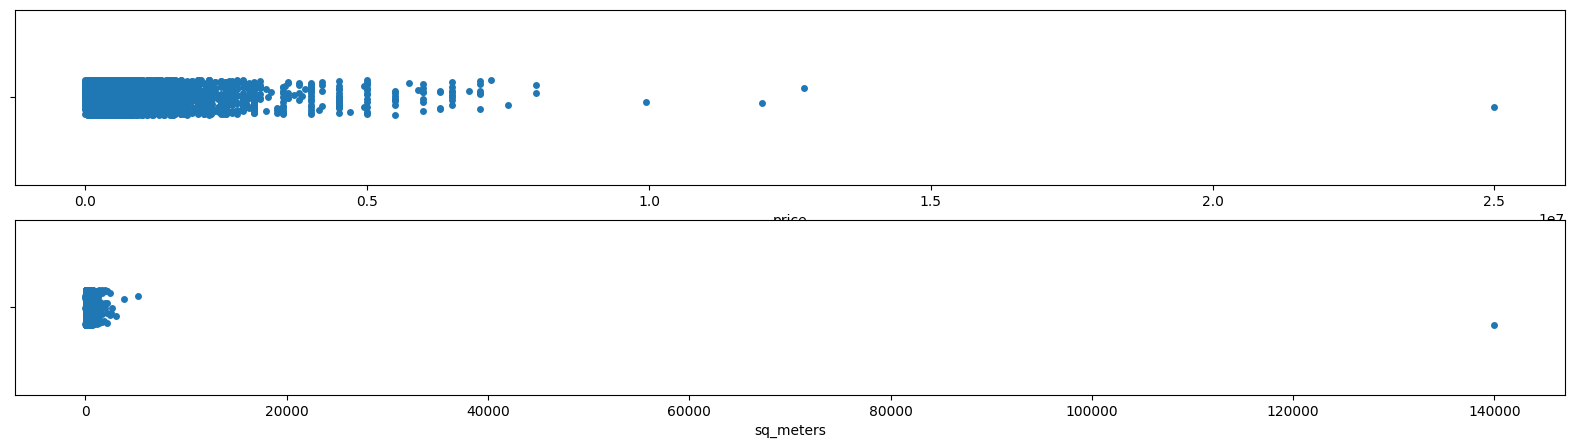

In [8]:
# plot for every numeric variable a stripplot to identify outliers

fig, ax = plt.subplots(2,1, figsize=(20,5))
sns.stripplot(df['price'], ax = ax[0], orient = 'h')
sns.stripplot(df['sq_meters'], ax = ax[1], orient = 'h')
fig.show()

In [9]:
# remove outliers based on z-score

df = df[(np.abs(stats.zscore(df[['price', 'sq_meters']])) < 3).all(axis=1)]
df.reset_index(drop = True, inplace = True)
df

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680,northern sub,567,200000,2005,1.0,apartment,4,...,0,0,0,0,0,0,0,0,0,0
1,43018583,134.7,15502,northern sub,642,550000,1992,0.0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807,northern sub,320,500000,2009,0.0,detached,2,...,0,0,0,1,0,0,0,0,0,0
3,39740833,122.0,14682,northern sub,95,230000,2007,1.0,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682,northern sub,195,370000,2007,0.0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,43079210,101.0,19009,beesy neighborhood,80,75000,1960,3.0,apartment,2,...,0,0,0,0,0,0,0,0,0,0
14388,43079212,103.5,19009,beesy neighborhood,69,70000,1975,2.0,apartment,2,...,0,0,0,0,0,0,0,0,0,0
14389,43079508,118.1,6976,beesy neighborhood,75,120000,1974,3.0,apartment,1,...,0,1,0,0,0,0,0,0,0,0
14390,40498665,78.7,7354,beesy neighborhood,800,600000,1930,0.0,building,1,...,0,0,0,0,0,0,0,0,0,0


/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_95177/1251574918.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


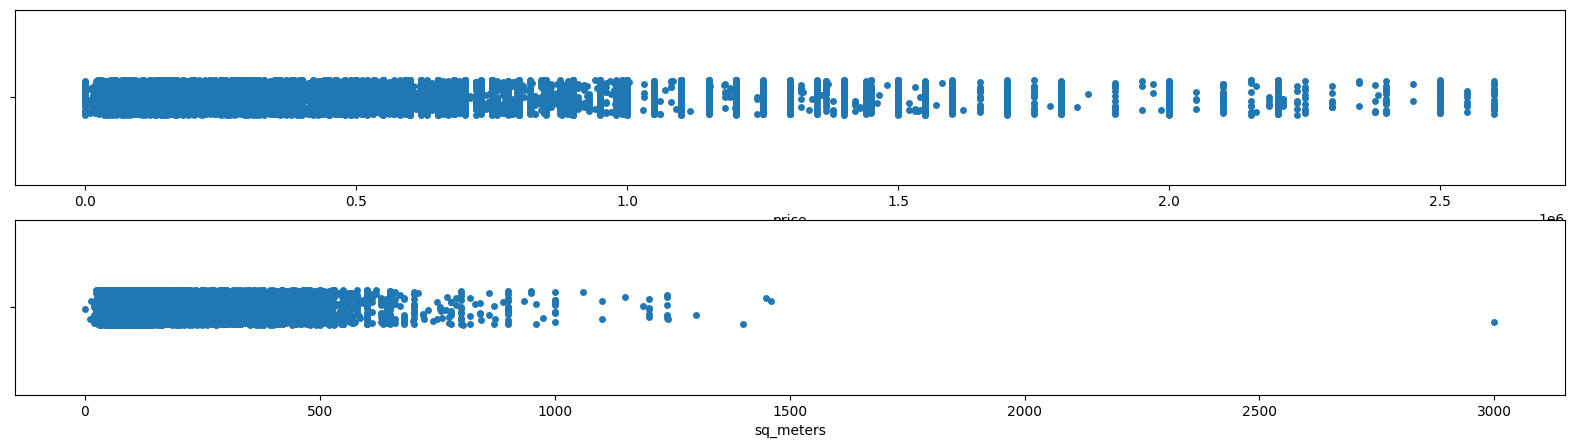

In [11]:
# plot for every numeric variable a stripplot to identify outliers

fig, ax = plt.subplots(2,1, figsize=(20,5))
sns.stripplot(df['price'], ax = ax[0], orient = 'h')
sns.stripplot(df['sq_meters'], ax = ax[1], orient = 'h')
fig.show()